In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
root_path = './'

dataset_train = pd.read_csv(''.join([root_path,'PM_train.txt']), sep=' ', header=None,engine='python').drop([26,27], axis=1)

col_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 
            's8', 's9', 's10', 's11', 's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

dataset_train.columns = col_names

In [11]:
dataset_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [3]:
# x축으로 사용
x = dataset_train.index.values

In [12]:
### s2 센서 그리기
sensor_name = 's5'
y= dataset_train[sensor_name].values


#이미지 분할
# n: 나눌 단위 시간 지정
n=1000
stride = 50
x_split= []
y_split= []

for i in range(int(len(y)/stride)+2):
    x_split.append(x[i*stride:n+i*stride])
    y_split.append(y[i*stride:n+i*stride])


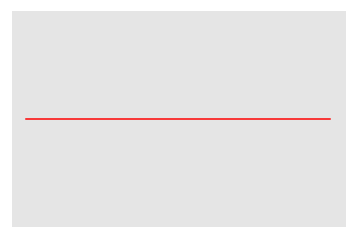

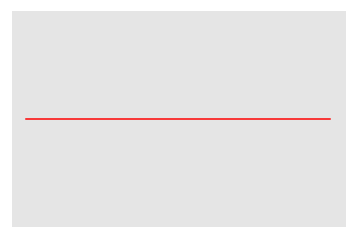

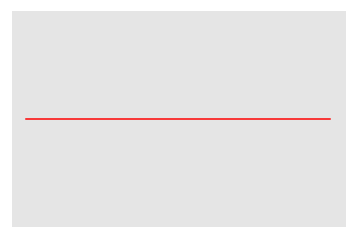

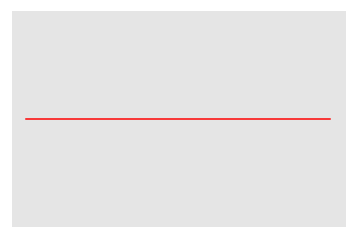

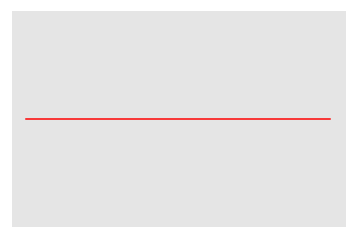

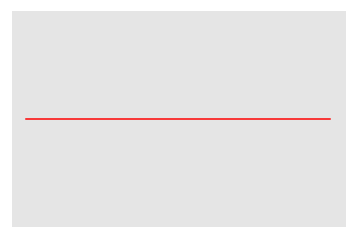

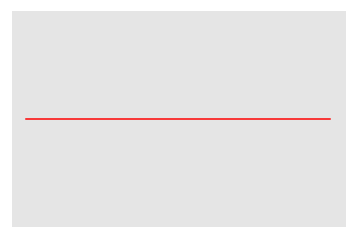

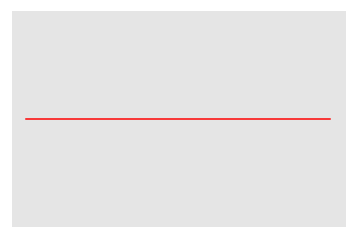

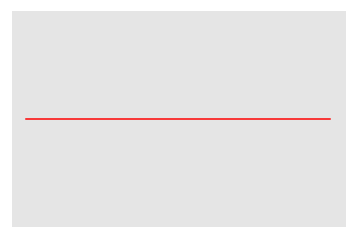

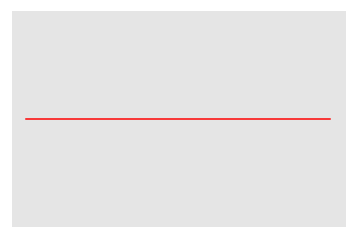

In [13]:

want_num_plt = 10 #몇 개 그릴 것인지 지정
for i in range(want_num_plt):
    fig = plt.figure()
    plt.plot(x_split[i], y_split[i], color='red')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    fig.savefig('graph'+'_'+ str(sensor_name) + '_'+ str(i) +'.png')
